  #      Topic:  Electric Grid Stability Simulated Data

        DATA DESCR:
            1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
            2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
            3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
            4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
            5. stabf: the stability label of the system (categorical: stable/unstable)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

## Reading and analysing the data

In [2]:
data = pd.read_csv('data/Electrical Grid Stability Simulated Data.csv')
print(data.head())

       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [4]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


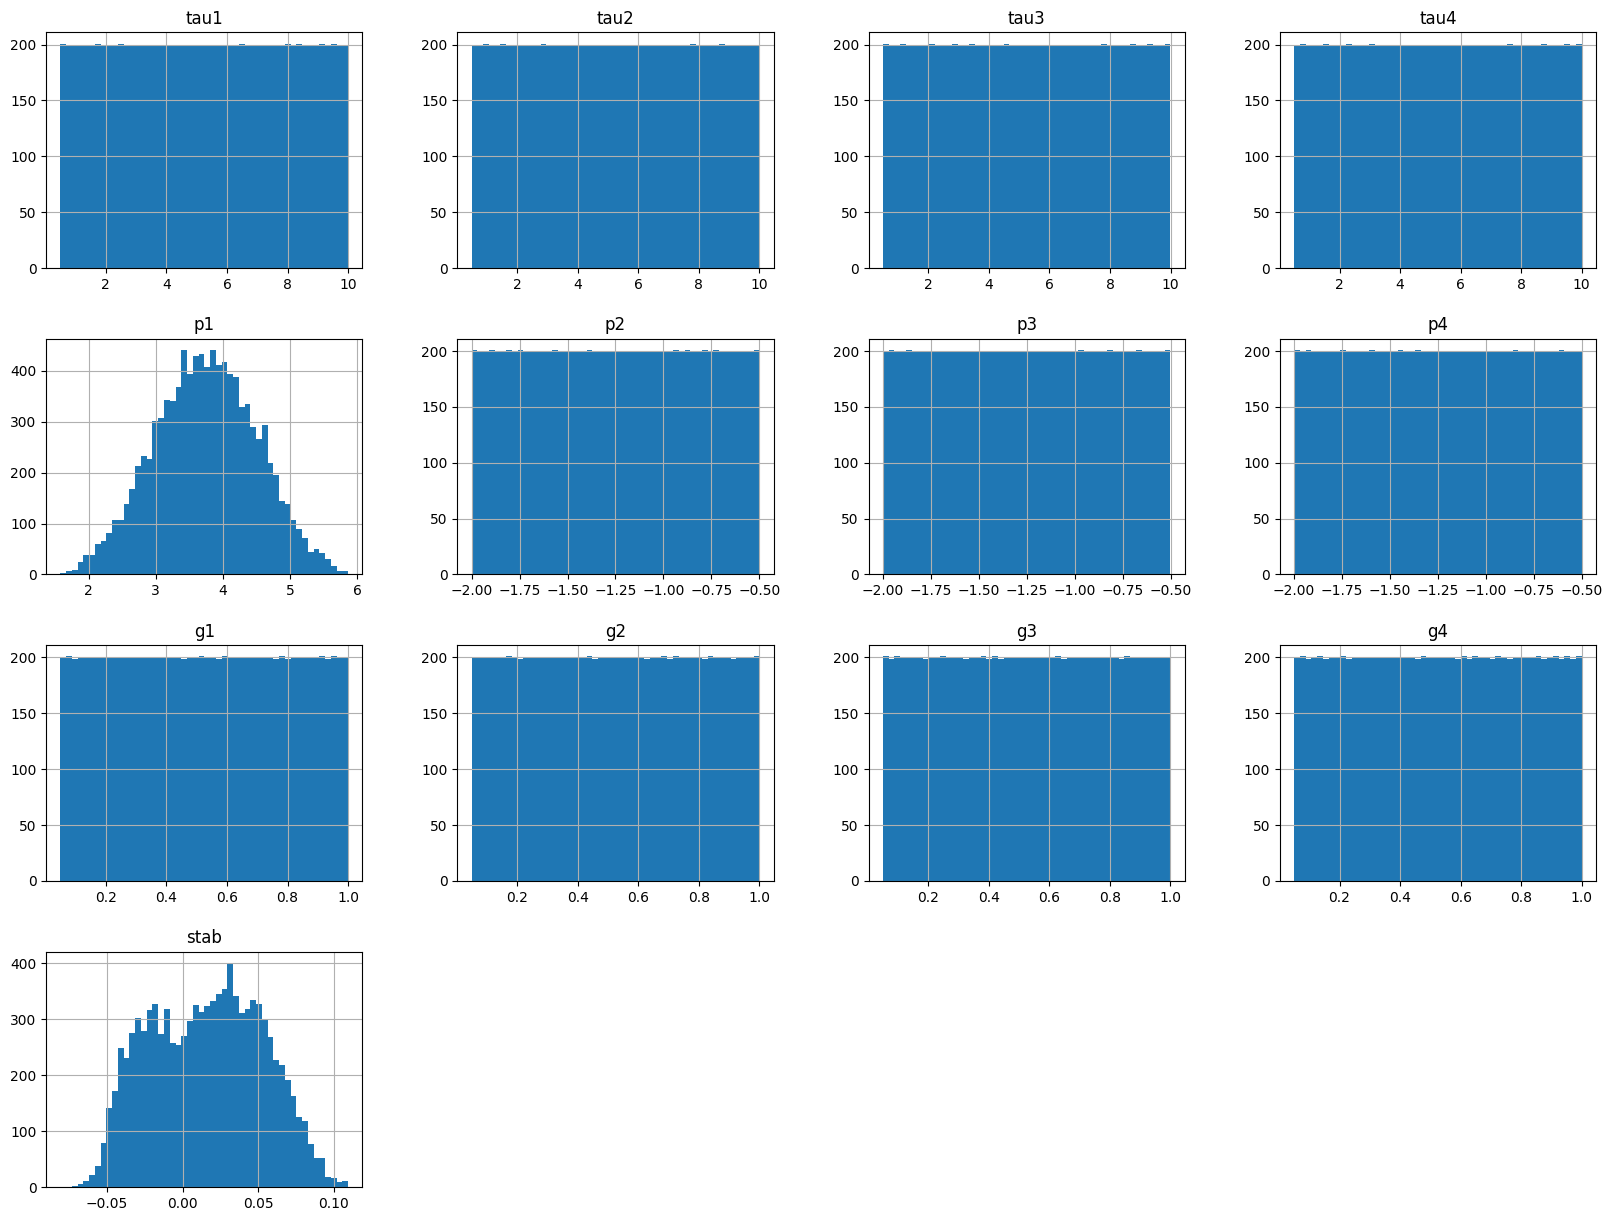

In [5]:
data.hist(bins=50,figsize=(20,15))
plt.show()

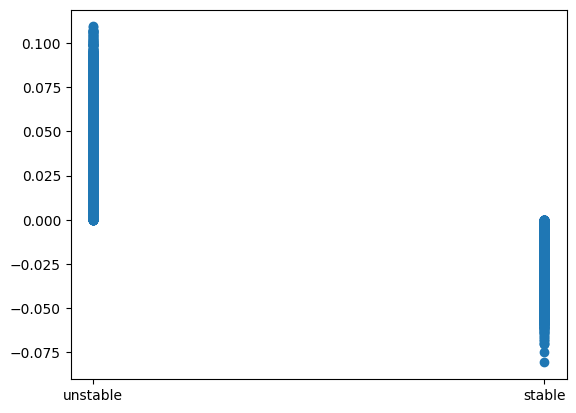

In [6]:
plt.scatter(data['stabf'], data['stab'])
plt.show()

    According to both the scatter plot above and the description of the data:  
        1. When 'stab' is negative, 'stabf' is stable
        2. When 'stab' is positive, 'stabf' is unstable

    Both stab and stabf correspond to the same feature, i.e, stability of the grid
    Therefore we can safely drop 'stab' as it is redundant data

In [7]:
df = data.drop(columns=['stab'])

### Seperating independent and dependent data

In [8]:
X = df.drop(columns=['stabf'])
y = df.iloc[:, -1]

In [9]:
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [10]:
y.head()

0    unstable
1      stable
2    unstable
3    unstable
4    unstable
Name: stabf, dtype: object

In [11]:
y = y.map({
    'unstable': 0, 
    'stable': 1
})
y.head()

0    0
1    1
2    0
3    0
4    0
Name: stabf, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7000, 12) (7000,)
(3000, 12) (3000,)


In [13]:
pca = PCA(n_components=2)
x2d = pca.fit_transform(X)
x2d_df = pd.DataFrame(x2d)

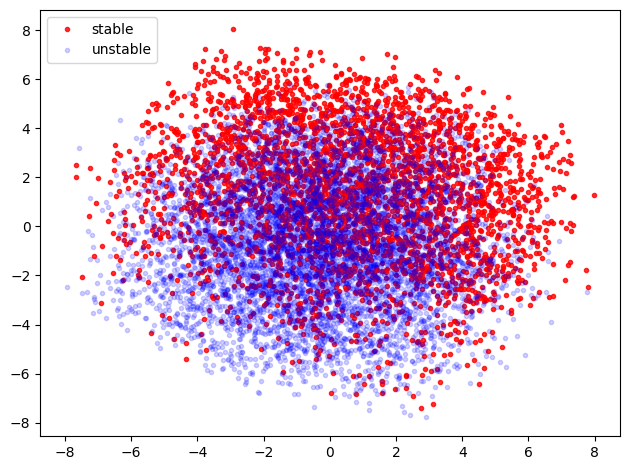

In [14]:
plt.plot(x2d_df[0][y==1], x2d_df[1][y==1], 'r.', ms=6, label='stable', alpha=0.8)
plt.plot(x2d_df[0][y==0], x2d_df[1][y==0], 'b.', ms=6, label='unstable', alpha=0.18)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

## Applying different models on the data

### Decision Tree

In [15]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 20)
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20)})

In [16]:
grid_dt.best_params_

{'criterion': 'entropy', 'max_depth': 13}

In [17]:
grid_dt.best_score_

0.8564285714285715

In [18]:
print(confusion_matrix(y_test, grid_dt.predict(X_test)))

[[1723  224]
 [ 216  837]]


In [19]:
print(classification_report(y_test, grid_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1947
           1       0.79      0.79      0.79      1053

    accuracy                           0.85      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.85      0.85      0.85      3000



### Logistic Regression

In [20]:
param_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
}

grid_logistic = GridSearchCV(LogisticRegression(), param_grid, cv=10)
grid_logistic.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky']})

In [21]:
grid_logistic.best_params_

{'solver': 'lbfgs'}

In [22]:
grid_logistic.best_score_

0.8147142857142857

In [23]:
print(confusion_matrix(y_test, grid_logistic.predict(X_test)))

[[1701  246]
 [ 295  758]]


In [24]:
print(classification_report(y_test, grid_logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1947
           1       0.75      0.72      0.74      1053

    accuracy                           0.82      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.82      0.82      0.82      3000



### SVM

In [25]:
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}

grid_svm = GridSearchCV(SVC(), param_grid, cv=10)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']})

In [26]:
grid_svm.best_params_

{'C': 100, 'kernel': 'rbf'}

In [27]:
grid_svm.best_score_

0.9584285714285714

In [28]:
print(confusion_matrix(y_test, grid_svm.predict(X_test)))

[[1891   56]
 [  57  996]]


In [29]:
print(classification_report(y_test, grid_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1947
           1       0.95      0.95      0.95      1053

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



### Naive Bayes Classifier

In [30]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_NB = GridSearchCV(GaussianNB(), param_grid, cv=10)
grid_NB.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [31]:
grid_NB.best_params_

{'var_smoothing': 6.579332246575683e-05}

In [32]:
grid_NB.best_score_

0.8285714285714285

In [33]:
print(confusion_matrix(y_test, grid_NB.predict(X_test)))

[[1796  151]
 [ 333  720]]


In [34]:
print(classification_report(y_test, grid_NB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1947
           1       0.83      0.68      0.75      1053

    accuracy                           0.84      3000
   macro avg       0.84      0.80      0.81      3000
weighted avg       0.84      0.84      0.83      3000



        Thus we can say that for this dataset:
        Best classifier/regressor: SVM
        best parameters: {'C': 100, 'kernel': 'rbf'}